In [1]:
import os
import random
import numpy as np
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
from keras._tf_keras.keras.applications.vgg16 import preprocess_input
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D, Conv2D, Input
from keras._tf_keras.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras._tf_keras.keras.optimizers import Adam
from keras._tf_keras.keras.models import load_model
import matplotlib.pyplot as plt
from keras._tf_keras.keras.preprocessing import image

In [2]:
# # Main directory
# main_directory = r'D:\Graduation\Project\FinalDataset\Training/'

# Categories
categories = ['Vú sữa hoàng kim', 'Sơ ri', 'Nha đam', 'Cóc', 'Táo', 'Bơ',
              'Chuối', 'Chi thanh mai', 'Ớt chuông', 'Cau', 'Khế tàu', 'Khổ qua rừng', 'Cherry đen', 'Lý chua đen', 'Dâu tằm đen', 'Thị', 'Việt quất', 'Bầu', 'Sa kê',
              'Dưa lưới', 'Khế', 'Điều', 'Sắn', 'Mãng cầu', 'Cherry', 'Quýt Clementine', 'Sung', 'Cacao', 'Dừa', 'Cà phê', 'Ngô', 'Dưa leo', 'Nghệ', 'Na',
              'Chà là', 'Dâu tằm', 'Thanh long', 'Sầu riêng',
              'Cà tím', 'Sổ bà',
              'Chanh ngón tay', 
              'Riềng', 'Sơn trà', 'Gừng', 'Kỷ tử', 'Nho', 'Mãng cầu gai', 'Ổi',
              'Táo gai',
              'Mít', 'Hồng táo',
              'Rau cải xoăn', 'Kiwi', 'Kim quất',
              'Bòn bon', 'Chanh', 'Keo dậu', 'Chanh vàng', 'Nhãn', 'Đậu đũa', 'Lêkima', 'Vải',
              'Mắcca', 'Xoài', 'Măng cụt', 'Thần kì', 'Nhàu', 'Mãng cầu núi', 'Sim',
              'Xuân đào',
              'Cam',
              'Lúa nước', 'Đu đủ', 'Chanh dây', 'Đậu', 'Lạc', 'Đào', 'Lê', 'Ớt', 'Hồng', 'Dứa', 'Lựu', 'Bưởi', 'Bí ngô',
              'Mộc qua',
              'Chôm chôm', 'Mâm xôi', 'Mướp', 'Roi',
              'Hồng xiêm', 'Đậu nành', 'Rau dền', 'Dâu tây', 'Khoai lang',
              'Quýt', 'Thuốc lá', 'Cà chua',
              'Vani',
              'Dưa hấu', 'Hồng sâm',
              'Bí ngòi']
category_nums = len(categories)

In [3]:
# data = []

# for category in categories:
#     category_path = os.path.join(main_directory, category)
#     for filename in os.listdir(category_path):
#         file_path = os.path.join(category_path, filename)
#         data.append({'file_path': file_path, 'label': category})

# # Convert the list to a DataFrame
# df = pd.DataFrame(data)

# train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
# validation_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)


In [ ]:
# # Define output directories for training, validation and test sets
# output_train_dir = r'D:\Graduation\Project\Dataset\Train'
# output_validation_dir = r'D:\Graduation\Project\Dataset\Validation'
# output_test_dir = r'D:\Graduation\Project\Dataset\Test'

In [ ]:
# Create the output directories 
# os.makedirs(output_train_dir, exist_ok=True)
# os.makedirs(output_validation_dir, exist_ok=True)
# os.makedirs(output_test_dir, exist_ok=True)

In [ ]:
# Create subdirectories for each class in train directory
# for category in categories:
#     os.makedirs(os.path.join(output_train_dir, category), exist_ok=True)

In [ ]:
# Create subdirectories for each class in validation directory
# for category in categories:
#     os.makedirs(os.path.join(output_validation_dir, category), exist_ok=True)

# Create subdirectories for each class in test directory
# for category in categories:
#     os.makedirs(os.path.join(output_test_dir, category), exist_ok=True)

In [ ]:
# Copy images to the train directory with class subdirectories
# for i, row in train_df.iterrows():
#     destination_path = os.path.join(output_train_dir, row['label'], f"{row['label']}_{i}.jpg")
#     shutil.copy(row['file_path'], destination_path)

# # Copy images to the validation directory with class subdirectories
# for i, row in validation_df.iterrows():
#     destination_path = os.path.join(output_validation_dir, row['label'], f"{row['label']}_{i}.jpg")
#     shutil.copy(row['file_path'], destination_path)

# # Copy images to the test directory with class subdirectories
# for i, row in test_df.iterrows():
#     destination_path = os.path.join(output_test_dir, row['label'], f"{row['label']}_{i}.jpg")
#     shutil.copy(row['file_path'], destination_path)

In [5]:
# Define the data augmentation parameters for training
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define only rescaling for validation and test
valid_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Set up the directory structure
directory = r'D:\Graduation\Project\Dataset'
training_dir = r'D:\Graduation\Project\Dataset\Train'
validation_dir = r'D:\Graduation\Project\Dataset\Validation'
test_dir = r'D:\Graduation\Project\Dataset\Test'

img_height = int(262 / 1.3)
img_width = int(213 / 1.3)
batch_size = 100

# Create generators for train, validation and test data
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = valid_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = valid_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 99669 images belonging to 100 classes.
Found 12459 images belonging to 100 classes.
Found 12459 images belonging to 100 classes.


In [6]:
# Define callbacks
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint_callback = ModelCheckpoint('model_weights.keras', monitor='val_accuracy', save_best_only=True)

In [ ]:
model = Sequential()

input_shape = (img_height, img_width, 3)
# Convolutional layers with batch normalization and max pooling
model.add(Input(shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the ouput before the dense layers
model.add(Flatten())

# Fully connected layers for classification
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.6))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer for classification with softmax activation
num_classes = len(train_generator.class_indices)
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with the Adam optimizer and a learning rate scheduler
opt = Adam(learning_rate=1e-4)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 199, 161, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 199, 161, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 78, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 97, 78, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 39, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 46, 37, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 105984)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    54,264,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,817,636 (209.11 MB)

 Trainable params: 54,814,948 (209.10 MB)

 Non-trainable params: 2,688 (10.50 KB)

In [7]:
model = load_model('D:\Graduation\Project\check_point\CNN_model_115e.keras')

In [12]:
# Train the model using the generators with callbacks
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping_callback, checkpoint_callback]
)

Epoch 1/15
996/996 ━━━━━━━━━━━━━━━━━━━━ 4642s 5s/step - accuracy: 0.7203 - loss: 0.9836 - val_accuracy: 0.6923 - val_loss: 1.1694
Epoch 2/15
996/996 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7700 - loss: 0.7991 - val_accuracy: 0.8136 - val_loss: 0.7622
Epoch 3/15
996/996 ━━━━━━━━━━━━━━━━━━━━ 4637s 5s/step - accuracy: 0.7241 - loss: 0.9731 - val_accuracy: 0.6765 - val_loss: 1.2164
Epoch 4/15
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 655us/step - accuracy: 0.6800 - loss: 1.0817 - val_accuracy: 0.8136 - val_loss: 0.7417
Epoch 5/15
996/996 ━━━━━━━━━━━━━━━━━━━━ 4640s 5s/step - accuracy: 0.7222 - loss: 0.9707 - val_accuracy: 0.6713 - val_loss: 1.2687
Epoch 6/15
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 561us/step - accuracy: 0.7100 - loss: 1.1067 - val_accuracy: 0.7797 - val_loss: 0.9207
Epoch 7/15
996/996 ━━━━━━━━━━━━━━━━━━━━ 4667s 5s/step - accuracy: 0.7272 - loss: 0.9511 - val_accuracy: 0.6961 - val_loss: 1.1854
Epoch 8/15
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 560us/step - accuracy: 0.7000 - loss: 0.8647 - va

In [14]:
# Evaluate the model using the test generator
test_evaluation = model.evaluate(
    test_generator,
    steps=test_generator.samples // batch_size
)

print("Test Loss: ", test_evaluation[0])
print("Test Accuracy: ", test_evaluation[1])

124/124 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.6401 - loss: 1.3806
Test Loss:  1.2450697422027588
Test Accuracy:  0.6751613020896912


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Class:  watermelon


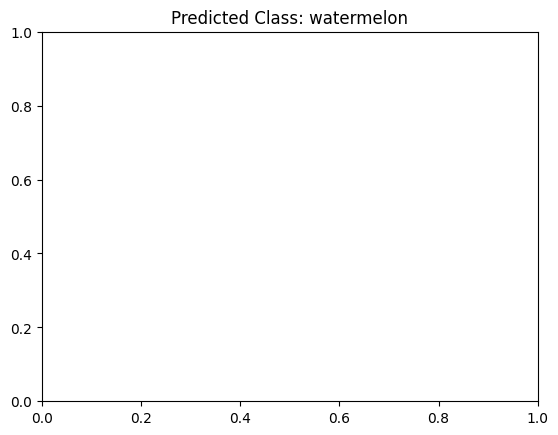

In [15]:
# Predict image path
image_path = r"D:\Graduation\Project\FinalDataset\Training\watermelon\524.jpg"

# Load and preprocess the image
img = image.load_img(image_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make the prediction
prediction = model.predict(img_array)

# Get the predicted class label
predicted_class_index = np.argmax(prediction)
predicted_class = list(train_generator.class_indices.keys())[predicted_class_index]

# Print the predicted class
print("Predicted Class: ", predicted_class)

# Display the image
plt.show(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.show()

In [13]:
# model.save('D:\Graduation\Project\check_point\CNN_model_115e.keras')

In [9]:
from sklearn.metrics import classification_report, accuracy_score

# Bước 1: Lấy nhãn thực tế và dự đoán
test_generator.reset()  # Đảm bảo thứ tự dự đoán đúng với dữ liệu
y_true = test_generator.classes  # Lấy nhãn thực tế
y_pred_prob = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
y_pred = y_pred_prob.argmax(axis=1)  # Lấy nhãn dự đoán

# Bước 2: Tính các giá trị đánh giá
accuracy = accuracy_score(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())

# In kết quả
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(report)


125/125 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step
Accuracy: 0.6755758889156434

Classification Report:
                  precision    recall  f1-score   support

            abiu       0.87      0.53      0.66       100
         acerola       0.59      0.49      0.54       100
        aloevera       0.76      0.70      0.73        80
       ambarella       0.63      0.55      0.59       110
           apple       0.59      0.50      0.54       120
         avocado       0.49      0.62      0.55       117
          banana       0.82      0.74      0.78        80
        bayberry       0.48      0.82      0.61       100
     bell pepper       0.90      0.64      0.75       100
       betel nut       0.57      0.57      0.57       102
         bilimbi       0.69      0.52      0.60       101
    bitter gourd       0.73      0.79      0.76       107
    black cherry       0.79      0.60      0.68       196
   black currant       0.88      0.85      0.87       201
 black mullberry       0.79      0

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Bước 1: Lấy nhãn thực tế và dự đoán
test_generator.reset()  # Đảm bảo thứ tự dự đoán đúng với dữ liệu
y_true = test_generator.classes  # Lấy nhãn thực tế
y_pred_prob = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
y_pred = y_pred_prob.argmax(axis=1)  # Lấy nhãn dự đoán

# Bước 2: Tính các giá trị đánh giá
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# In kết quả
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

d:\Graduation\Project\project_venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step
Accuracy: 0.6755758889156434
Precision: 0.7004502061647375
Recall: 0.6755758889156434
F1: 0.6742922460130747
